In [439]:
import h5py

In [504]:
import seaborn as sb

In [440]:
import matplotlib.pyplot as plt

In [441]:
import numpy as np

In [520]:
data = h5py.File('train.h5')

['list_classes', 'train_set_x', 'train_set_y']

In [534]:
test = h5py.File('test.h5')
x_test =test['test_set_x']
x_test= np.array(x_test)
test_x = x_test.reshape(x_test.shape[0],-1)
test_x.shape
test_y= test["test_set_y"]
test_y =np.array(test_y)
test_y = test_y.reshape(1,50)
test_y.shape

(1, 50)

In [443]:
import matplotlib.pyplot as plt

In [494]:
x  = data['train_set_x']
x = np.array(x)
train_x = x.reshape(x.shape[0],-1)
train_x.shape

(209, 12288)

In [445]:
list(data)

['list_classes', 'train_set_x', 'train_set_y']

In [530]:
y= data["train_set_y"]
y =np.array(y)
y = y.reshape(1,209)
y.shape

(1, 209)

In [447]:
train_x=train_x.transpose()
train_x.shape

(12288, 209)

In [448]:
train_x =train_x/255

In [449]:
n_x,n_h,n_y = 12288,7,1
iterations = 10000

In [450]:
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x) *0.01
    b1 = np.zeros((n_h,1))
    w2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,n_y))
    return w1,b1,w2,b2

In [451]:
w1,b1,w2,b2 = initialize_parameters(n_x,n_h,n_y)
learning_rate = 0.075

In [452]:
def sigmoid(z):
    s= 1/(1+np.exp(-z))
    return s
def relu(z):
    s = (z>=0)
    z = np.multiply(s,z)
    return z

In [453]:
def forward(A_prev,w,b,activation):
    Z = np.dot(w,A_prev) +b
    if activation=='sigmoid':
        a = sigmoid(Z)
    if activation == 'relu':
        a = relu(Z)
    cache =(A_prev,w,b,Z)
    return a,cache

In [454]:
def compute_cost(y,a):
    m = y.size
    cost = -(1/m) *(np.dot(np.log(a),y.T)+np.dot(np.log((1-a)),(1-y).T))
    return cost

In [455]:
def relu_backward(da,z):
    z = (z>0)
    return np.multiply(da,z)
def sigmoid_backward(da,z):
    dz = np.multiply(da,np.multiply(sigmoid(z),(1-sigmoid(z))))
    return dz

In [456]:
def update_parameters(dw1,db1,dw2,db2,w1,b1,w2,b2):
    w1 = w1- learning_rate * dw1
    w2 = w2- learning_rate * dw2
    b1 = b1- learning_rate * db1
    b2 = b2- learning_rate * db2
    return w1,w2,b1,b2

cost after0iterations is [[ 0.69414815]]
cost after100iterations is [[ 0.54434651]]
cost after200iterations is [[ 0.56872154]]
cost after300iterations is [[ 0.53298063]]
cost after400iterations is [[ 0.41478846]]
cost after500iterations is [[ 0.52033659]]
cost after600iterations is [[ 0.50434427]]
cost after700iterations is [[ 0.51282781]]
cost after800iterations is [[ 0.25624692]]
cost after900iterations is [[ 0.50498294]]
cost after1000iterations is [[ 0.4151507]]
cost after1100iterations is [[ 0.29621246]]
cost after1200iterations is [[ 0.67107674]]
cost after1300iterations is [[ 0.23594448]]
cost after1400iterations is [[ 0.14660698]]
cost after1500iterations is [[ 0.12618702]]
cost after1600iterations is [[ 0.11542123]]
cost after1700iterations is [[ 0.1099509]]
cost after1800iterations is [[ 0.11076017]]
cost after1900iterations is [[ 0.10633889]]
cost after2000iterations is [[ 0.10377942]]
cost after2100iterations is [[ 0.10307529]]
cost after2200iterations is [[ 0.07959502]]
co

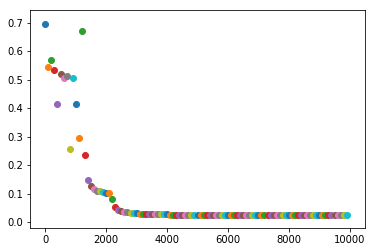

In [457]:
for i in range (iterations):
    m=209
    a1, cache1 = forward(train_x,w1,b1,'relu')
    a2, cache2 = forward(a1,w2,b2,'sigmoid')
    a1,w2,b2,z2 = cache2
    a0,w1,b1,z1 = cache1
    cost = compute_cost(y,a2)
    da2 = -(np.divide(y,a2)-np.divide(1-y,1-a2))
    dz2 = sigmoid_backward(da2,z2)
    dw2 = (1/m) * np.dot(dz2,a1.T)
    db2 = (1/m) * np.sum(dz2,axis =1 ,keepdims =True)
    da1 = np.dot(w2.T,dz2)
    dz1 = relu_backward(da1,z1)
    dw1 = (1/m) * np.dot(dz1,a0.T)
    db1 = (1/m) * np.sum(dz1,axis =1 ,keepdims =True)
    w1,w2,b1,b2 = update_parameters(dw1,db1,dw2,db2,w1,b1,w2,b2)
    if(i%100==0):
        print('cost after'+str(i)+'iterations is '+str(cost))
        plt.scatter(i,cost)
plt.show()

In [497]:
def predict(x):
    z1 = np.dot(w1,x)+b1
    a1 = relu(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = sigmoid(z2)
    a2 = (a2>0.5)
    a2 =a2 *1
    return a2

In [536]:
def accuracy(x,y):
    y_train_predict = predict(x.T)
    score = (y_train_predict==y)
    size=score.size
    return (np.sum(score)/size)*100

In [538]:
print("accuracy on train set " +str(accuracy(train_x,y))+'%')
print("accuracy on test set " +str(accuracy(test_x,test_y))+'%')


accuracy on train set 99.5215311005%
accuracy on test set 42.0%


C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
